In [1]:
filename = 'gd1_results.fits'
from astropy.table import Table

results = Table.read(filename)

In [2]:
from pyia import GaiaData

gaia_data = GaiaData(results)
type(gaia_data)

pyia.data.GaiaData

In [3]:
import astropy.units as u

skycoord = gaia_data.get_skycoord(
                distance=8*u.kpc, 
                radial_velocity=0*u.km/u.s)

In [4]:
import gala.coordinates as gc

transformed = skycoord.transform_to(gc.GD1Koposov10)
type(transformed)

astropy.coordinates.sky_coordinate.SkyCoord

In [5]:
gd1_coord = gc.reflex_correct(transformed)

type(gd1_coord)

astropy.coordinates.sky_coordinate.SkyCoord

In [6]:
phi1 = gd1_coord.phi1
phi2 = gd1_coord.phi2

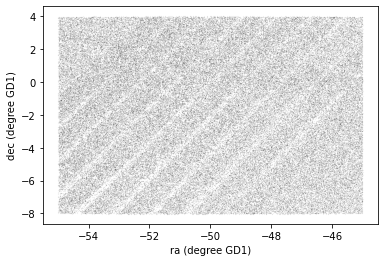

In [7]:
import matplotlib.pyplot as plt

plt.plot(phi1, phi2, 'ko', markersize=0.1, alpha=0.2)

plt.xlabel('ra (degree GD1)')
plt.ylabel('dec (degree GD1)');

In [8]:
import pandas as pd

df = results.to_pandas()
df.shape

(140340, 8)

In [9]:
df['phi1'] = gd1_coord.phi1
df['phi2'] = gd1_coord.phi2
df.shape

(140340, 10)

In [10]:

df['pm_phi1'] = gd1_coord.pm_phi1_cosphi2
df['pm_phi2'] = gd1_coord.pm_phi2
df.shape

(140340, 12)

In [11]:
phi2_min = -1.0 * u.deg
phi2_max = 1.0 * u.deg

phi_mask = ((df['phi2'] > phi2_min) & 
            (df['phi2'] < phi2_max))

phi_mask.sum()

25084

In [12]:
centerline = df[phi_mask]


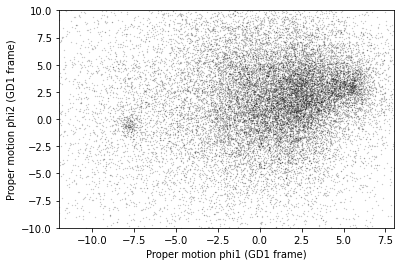

In [13]:
pm1 = centerline['pm_phi1']
pm2 = centerline['pm_phi2']

plt.plot(pm1, pm2, 'ko', markersize=0.3, alpha=0.3)
    
plt.xlabel('Proper motion phi1 (GD1 frame)')
plt.ylabel('Proper motion phi2 (GD1 frame)')

plt.xlim(-12, 8)
plt.ylim(-10, 10);

In [14]:
pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max =  1.0

In [15]:
pm1_rect = [pm1_min, pm1_min, pm1_max, pm1_max, pm1_min] * u.mas/u.yr
pm2_rect = [pm2_min, pm2_max, pm2_max, pm2_min, pm2_min] * u.mas/u.yr

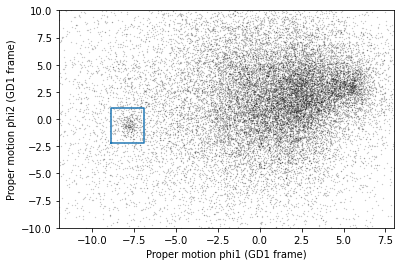

In [16]:
plt.plot(pm1, pm2, 'ko', markersize=0.3, alpha=0.3)
plt.plot(pm1_rect, pm2_rect, '-')
    
plt.xlabel('Proper motion phi1 (GD1 frame)')
plt.ylabel('Proper motion phi2 (GD1 frame)')

plt.xlim(-12, 8)
plt.ylim(-10, 10);

In [17]:
def between(series, low, high):
    """Make a Boolean Series.
    
    series: Pandas Series
    low: lower bound
    high: upper bound
    
    returns: Boolean Series
    """
    return (series > low) & (series < high)

In [18]:
pm_mask = (between(df['pm_phi1'], pm1_min, pm1_max) & 
           between(df['pm_phi2'], pm2_min, pm2_max))

In [19]:
pm_mask.sum()

1049

In [20]:
selected = df[pm_mask]

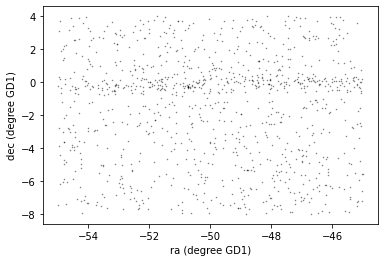

In [21]:
phi1 = selected['phi1']
phi2 = selected['phi2']

plt.plot(phi1, phi2, 'ko', markersize=0.5, alpha=0.5)

plt.xlabel('ra (degree GD1)')
plt.ylabel('dec (degree GD1)');

In [22]:
filename = 'gd1_dataframe.hdf5'

df.to_hdf(filename, 'df')
centerline.to_hdf(filename, 'centerline')
selected.to_hdf(filename, 'selected')

In [110]:
!ls -lh gd1_dataframe.hdf5

-rw-rw-r-- 1 downey downey 17M Nov 18 19:06 gd1_dataframe.hdf5


In [111]:
!rm gd1_dataframe.hdf5

In [112]:
!wget https://github.com/AllenDowney/AstronomicalData/raw/main/data/gd1_dataframe.hdf5

--2020-11-18 19:31:21--  https://github.com/AllenDowney/AstronomicalData/raw/main/data/gd1_dataframe.hdf5
Resolving github.com... 140.82.114.3
Connecting to github.com|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/AstronomicalData/main/data/gd1_dataframe.hdf5 [following]
--2020-11-18 19:31:21--  https://raw.githubusercontent.com/AllenDowney/AstronomicalData/main/data/gd1_dataframe.hdf5
Resolving raw.githubusercontent.com... 151.101.116.133
Connecting to raw.githubusercontent.com|151.101.116.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17335888 (17M) [application/octet-stream]
Saving to: ‘gd1_dataframe.hdf5’

gd1_dataframe.hdf5  100%[===================>]  16.53M  8.77MB/s    in 1.9s    

2020-11-18 19:31:24 (8.77 MB/s) - ‘gd1_dataframe.hdf5’ saved [17335888/17335888]



In [113]:
import pandas as pd

filename = 'gd1_dataframe.hdf5'
df = pd.read_hdf(filename, 'df')
centerline = pd.read_hdf(filename, 'centerline')
selected = pd.read_hdf(filename, 'selected')

In [29]:
df.shape

(140340, 12)

In [30]:
centerline.shape

(25084, 12)

In [36]:
selected.shape

(1049, 12)

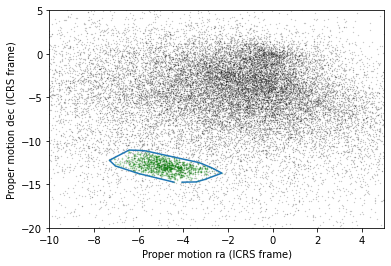

In [38]:
import numpy as np

In [40]:
points = selected[['pmra', 'pmdec']].to_numpy()

In [41]:
points

array([[ -3.65859609, -12.48641977],
       [ -3.57235105, -13.19584836],
       [ -4.52678061, -12.74505387],
       ...,
       [ -3.7313674 , -13.06684162],
       [ -3.63378135, -12.93358913],
       [ -3.44742277, -13.22808211]])

In [42]:
points.shape

(1049, 2)

In [43]:
from scipy.spatial import ConvexHull

In [44]:
hull = ConvexHull(points)

In [45]:
hull

In [47]:
hull.vertices

array([ 692,  873,  141,  303,   42,  622,   45,   83,  127,  182, 1006,
        971,  967, 1001,  969,  940], dtype=int32)

In [49]:
pm_vertices = points[hull.vertices]

In [50]:
type(pm_vertices)

numpy.ndarray

In [51]:
pm_vertices.shape

(16, 2)

In [52]:
pm_vertices

array([[ -4.05037121, -14.75623261],
       [ -3.41981085, -14.72365546],
       [ -3.03521988, -14.44357135],
       [ -2.26847919, -13.7140236 ],
       [ -2.61172203, -13.24797471],
       [ -2.73471401, -13.09054471],
       [ -3.19923146, -12.5942653 ],
       [ -3.34082546, -12.47611926],
       [ -5.67489413, -11.16083338],
       [ -5.95159272, -11.10547884],
       [ -6.42394023, -11.05981295],
       [ -7.09631023, -11.95187806],
       [ -7.30641519, -12.24559977],
       [ -7.04016696, -12.88580702],
       [ -6.00347705, -13.75912098],
       [ -4.42442296, -14.74641176]])

In [54]:
xs, ys = np.transpose(pm_vertices)

In [55]:
xs

array([-4.05037121, -3.41981085, -3.03521988, -2.26847919, -2.61172203,
       -2.73471401, -3.19923146, -3.34082546, -5.67489413, -5.95159272,
       -6.42394023, -7.09631023, -7.30641519, -7.04016696, -6.00347705,
       -4.42442296])

In [56]:
ys

array([-14.75623261, -14.72365546, -14.44357135, -13.7140236 ,
       -13.24797471, -13.09054471, -12.5942653 , -12.47611926,
       -11.16083338, -11.10547884, -11.05981295, -11.95187806,
       -12.24559977, -12.88580702, -13.75912098, -14.74641176])

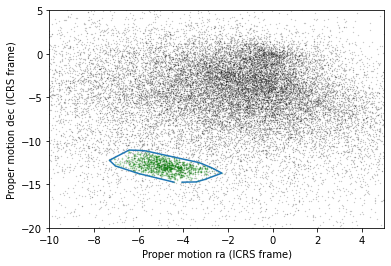

In [58]:
pm1 = centerline['pmra']
pm2 = centerline['pmdec']
plt.plot(pm1, pm2, 'ko', markersize=0.3, alpha=0.3)

pm1 = selected['pmra']
pm2 = selected['pmdec']
plt.plot(pm1, pm2, 'gx', markersize=1, alpha=0.3)

plt.plot(xs, ys)
    
plt.xlabel('Proper motion ra (ICRS frame)')
plt.ylabel('Proper motion dec (ICRS frame)')

plt.xlim([-10, 5])
plt.ylim([-20, 5]);

In [61]:
pm_vertices

array([[ -4.05037121, -14.75623261],
       [ -3.41981085, -14.72365546],
       [ -3.03521988, -14.44357135],
       [ -2.26847919, -13.7140236 ],
       [ -2.61172203, -13.24797471],
       [ -2.73471401, -13.09054471],
       [ -3.19923146, -12.5942653 ],
       [ -3.34082546, -12.47611926],
       [ -5.67489413, -11.16083338],
       [ -5.95159272, -11.10547884],
       [ -6.42394023, -11.05981295],
       [ -7.09631023, -11.95187806],
       [ -7.30641519, -12.24559977],
       [ -7.04016696, -12.88580702],
       [ -6.00347705, -13.75912098],
       [ -4.42442296, -14.74641176]])

In [63]:
t = [str(x) for x in pm_vertices.flatten()]
len(t)

32

In [66]:
pm_point_list = ', '.join(t)
pm_point_list

'-4.050371212154984, -14.75623260987968, -3.4198108491382455, -14.723655456335619, -3.035219883740934, -14.443571352854612, -2.268479190206636, -13.714023598831554, -2.611722027231764, -13.247974712069263, -2.7347140078529106, -13.090544709622938, -3.199231461993783, -12.594265302440828, -3.34082545787549, -12.476119260818695, -5.674894125178565, -11.160833381392624, -5.95159272432137, -11.105478836426514, -6.423940229776128, -11.05981294804957, -7.096310230579248, -11.951878058650085, -7.306415190921692, -12.245599765990594, -7.040166963232815, -12.885807024935527, -6.0034770546523735, -13.759120984106968, -4.42442296194263, -14.7464117578883'

In [106]:
phi1_min = -70
phi1_max = -20
phi2_min = -5
phi2_max = 5

In [107]:
import astropy.units as u

phi1_rect = [phi1_min, phi1_min, phi1_max, phi1_max] * u.deg
phi2_rect = [phi2_min, phi2_max, phi2_max, phi2_min] * u.deg

In [108]:
import gala.coordinates as gc
import astropy.coordinates as coord

corners = gc.GD1Koposov10(phi1=phi1_rect, phi2=phi2_rect)
corners_icrs = corners.transform_to(coord.ICRS)

In [109]:
point_base = "{point.ra.value}, {point.dec.value}"

t = [point_base.format(point=point)
     for point in corners_icrs]

point_list = ', '.join(t)
point_list

'135.30559858565638, 8.398623940157561, 126.50951508623503, 13.44494195652069, 163.0173655836748, 54.24242734020255, 172.9328536286811, 46.47260492416258'

In [74]:
query_base = """SELECT 
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2 
  AND 1 = CONTAINS(POINT(ra, dec), 
                   POLYGON({point_list}))
"""

In [75]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax, parallax_error, radial_velocity'

**Exercise 1:** Use `format` to format `query_base` and define `query`, filling in the values of `columns` and `point_list`.

In [77]:
query = query_base.format(columns=columns, point_list=point_list)

In [78]:
print(query)

SELECT 
source_id, ra, dec, pmra, pmdec, parallax, parallax_error, radial_velocity
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2 
  AND 1 = CONTAINS(POINT(ra, dec), 
                   POLYGON(135.30559858565638, 8.398623940157561, 126.50951508623503, 13.44494195652069, 163.0173655836748, 54.24242734020255, 172.9328536286811, 46.47260492416258))



**Exercise 2:** Modify `query_base` by adding a new clause to select stars whose coordinates of proper motion, `pmra` and `pmdec`, fall within the polygon defined by `pm_point_list`.

In [79]:
query_base = """SELECT 
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2 
  AND 1 = CONTAINS(POINT(ra, dec), 
                   POLYGON({point_list}))
  AND 1 = CONTAINS(POINT(pmra, pmdec), 
                   POLYGON({pm_point_list}))
"""

In [80]:
query = query_base.format(columns=columns, 
                          point_list=point_list, 
                          pm_point_list=pm_point_list)

In [82]:
print(query)

SELECT 
source_id, ra, dec, pmra, pmdec, parallax, parallax_error, radial_velocity
FROM gaiadr2.gaia_source
WHERE parallax < 1
  AND bp_rp BETWEEN -0.75 AND 2 
  AND 1 = CONTAINS(POINT(ra, dec), 
                   POLYGON(135.30559858565638, 8.398623940157561, 126.50951508623503, 13.44494195652069, 163.0173655836748, 54.24242734020255, 172.9328536286811, 46.47260492416258))
  AND 1 = CONTAINS(POINT(pmra, pmdec), 
                   POLYGON(-4.050371212154984, -14.75623260987968, -3.4198108491382455, -14.723655456335619, -3.035219883740934, -14.443571352854612, -2.268479190206636, -13.714023598831554, -2.611722027231764, -13.247974712069263, -2.7347140078529106, -13.090544709622938, -3.199231461993783, -12.594265302440828, -3.34082545787549, -12.476119260818695, -5.674894125178565, -11.160833381392624, -5.95159272432137, -11.105478836426514, -6.423940229776128, -11.05981294804957, -7.096310230579248, -11.951878058650085, -7.306415190921692, -12.245599765990594, -7.040166963232815, -12.

In [83]:
from astroquery.gaia import Gaia

job = Gaia.launch_job_async(query)
print(job)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
INFO: Query finished. [astroquery.utils.tap.core]
<Table length=7346>
      name       dtype    unit                              description                             n_bad
--------------- ------- -------- ------------------------------------------------------------------ -----
      source_id   int64          Unique source identifier (unique within a particular Data Release)     0
             ra float64      deg                                                    Right ascension     0
            dec float64      deg                                                        Declination     0
           pmra float64 mas / yr                         Proper motion in right ascension direction     0
          pmdec float64 mas / yr                             Proper motion in declin

In [87]:
candidate_table = job.get_results()
type(candidate_table)

astropy.table.table.Table

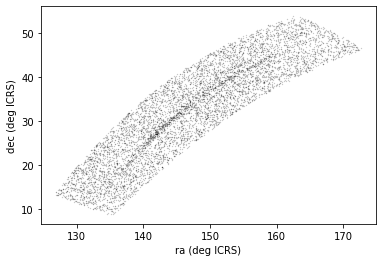

In [88]:
x = candidate_table['ra']
y = candidate_table['dec']

plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

plt.xlabel('ra (deg ICRS)')
plt.ylabel('dec (deg ICRS)');

In [89]:
from pyia import GaiaData

def make_dataframe(table):
    """Transform coordinates from ICRS to GD-1 frame.
    
    table: Astropy Table
    
    returns: Pandas DataFrame
    """
    gaia_data = GaiaData(table)

    c_sky = gaia_data.get_skycoord(distance=8*u.kpc, 
                                   radial_velocity=0*u.km/u.s)
    c_gd1 = gc.reflex_correct(
                c_sky.transform_to(gc.GD1Koposov10))

    df = table.to_pandas()
    df['phi1'] = c_gd1.phi1
    df['phi2'] = c_gd1.phi2
    df['pm_phi1'] = c_gd1.pm_phi1_cosphi2
    df['pm_phi2'] = c_gd1.pm_phi2
    return df

In [90]:
candidate_df = make_dataframe(candidate_table)
candidate_df.shape

(7346, 12)

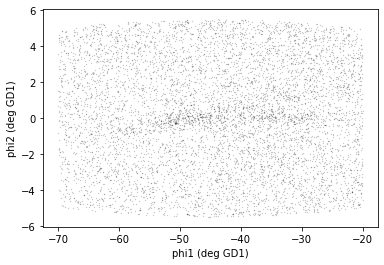

In [91]:
x = candidate_df['phi1']
y = candidate_df['phi2']

plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

plt.xlabel('phi1 (deg GD1)')
plt.ylabel('phi2 (deg GD1)');

**Exercise**  Write `candidate_df` to an HDF file named `gd1_candidates`.

Save it as a dataset named `candidate_df`.

In [104]:
candidate_df.to_hdf('gd1_candidates.hdf', 'candidate_df')

In [105]:
!ls -lh gd1_candidates.hdf

-rw-rw-r-- 1 downey downey 756K Nov 18 15:54 gd1_candidates.hdf


In [98]:
candidate_df.to_csv('gd1_candidates.csv')

In [99]:
!ls -lh gd1_candidates.csv

-rw-rw-r-- 1 downey downey 1.6M Nov 18 15:51 gd1_candidates.csv


In [100]:
!head gd1_candidates.csv

,source_id,ra,dec,pmra,pmdec,parallax,parallax_error,radial_velocity,phi1,phi2,pm_phi1,pm_phi2
0,635559124339440000,137.58671691646745,19.1965441084838,-3.770521900009566,-12.490481778113859,0.7913934419894347,0.2717538145759051,,-59.63048941944396,-1.21648525150429,-7.3613627125974945,-0.5926328820644919
1,635860218726658176,138.5187065217173,19.09233926905897,-5.941679495793577,-11.346409129876392,0.30745551377348623,0.19946557779138105,,-59.247329893833296,-2.0160784008206476,-7.52712608464053,1.7487794924176672
2,635674126383965568,138.8428741026386,19.031798198627634,-3.8970011609340207,-12.702779525389634,0.7794631695848825,0.22369151932421705,,-59.13339098769217,-2.3069007451798287,-7.560607655557421,-0.7417999555980245
3,635535454774983040,137.8377518255436,18.864006786112604,-4.335040664412791,-14.492308604905652,0.31451429349160354,0.10277456217796248,,-59.78529963350303,-1.5945692849622026,-9.35753561702402,-1.2184922339592716
4,635497276810313600,138.0445160213759,19.009471